#### Load Libraries

In [34]:
# For Data Analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle Warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
# ML Models and Evaluation Metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

#### Load Dataset

Scource of Dataset is: <b>Kaggle</b> [Download Here..](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download)

In [36]:
# Load Dataset

df = pd.read_csv('data/heart.csv')

In [37]:
# See the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:
# See the last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Metadata (Column Details)

1. age: Age in Years of patient
2. sex: Gender
3. cp: Chest Pain
4. trestbps: Resting Blood Pressure (in Hg) on admission to the hospital
5. chol: Cholestroal in mg/dl
6. fbs: Fasting Blood Sugar in mg/dl (If fbs greater then 120: True: 1, False: 0)
7. restecg: Resting Electrocardiographic (ECG) Results
8. thalach: Maximum Heart Rate
9. exang: Excersise induced Angina (1: Yes, 0: No)
10. oldpeak: ST Depression induced by excersise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by Flourosopy
13. thal: Thalassemia/Stress Test Result 0 = Normal, 1 = Fixed Defect, 2 = Reversable Defect
14. target: Is disease or not 1: Yes, 0: No

- ST: It's refers to a specific part of an ECG (Electrocardiogram) tracing.

In [39]:
# Set Column Names

df.columns = ['Age', 'Gender', 'ChestPain', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MajorVessels', 'ThalassemiaTest', 'Target']

In [40]:
# Check sample data
df.sample(5)

,Age,Gender,ChestPain,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MajorVessels,ThalassemiaTest,Target
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
261,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
587,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
718,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1


#### Basic Information

In [41]:
# Check the shape of the dataset
rows, cols = df.shape
print(f'The dataset contains {rows} rows and {cols} columns.')

The dataset contains 1025 rows and 14 columns.


In [42]:
# Get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Gender           1025 non-null   int64  
 2   ChestPain        1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  MajorVessels     1025 non-null   int64  
 12  ThalassemiaTest  1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
# Check missing values
df.isnull().sum()

Age                0
Gender             0
ChestPain          0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
MajorVessels       0
ThalassemiaTest    0
Target             0
dtype: int64

In [44]:
# Check duplicate rows
df.duplicated().sum()

np.int64(723)

##### Duplicates
There are huge no of duplicated data, that's are not suitable for our ML model training and analysis. So, I'll drop all duplicated data.

In [45]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [46]:
# Check shape after dropping duplicates
rows, cols = df.shape
print(f'After dropping duplicates, the dataset contains {rows} rows and {cols} columns')

After dropping duplicates, the dataset contains 302 rows and 14 columns


In [51]:
# Seprate Discrete(Categorical) and Continuous Features

disc_feat = [var for var in df.columns if df[var].value_counts().count() < 15 and var != "Target"]
count_feat = [var for var in df.columns if var not in disc_feat and var != "Target"]
target_feat = df['Target']

In [52]:
# Get Statistical Summary of continuous features
df[count_feat].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


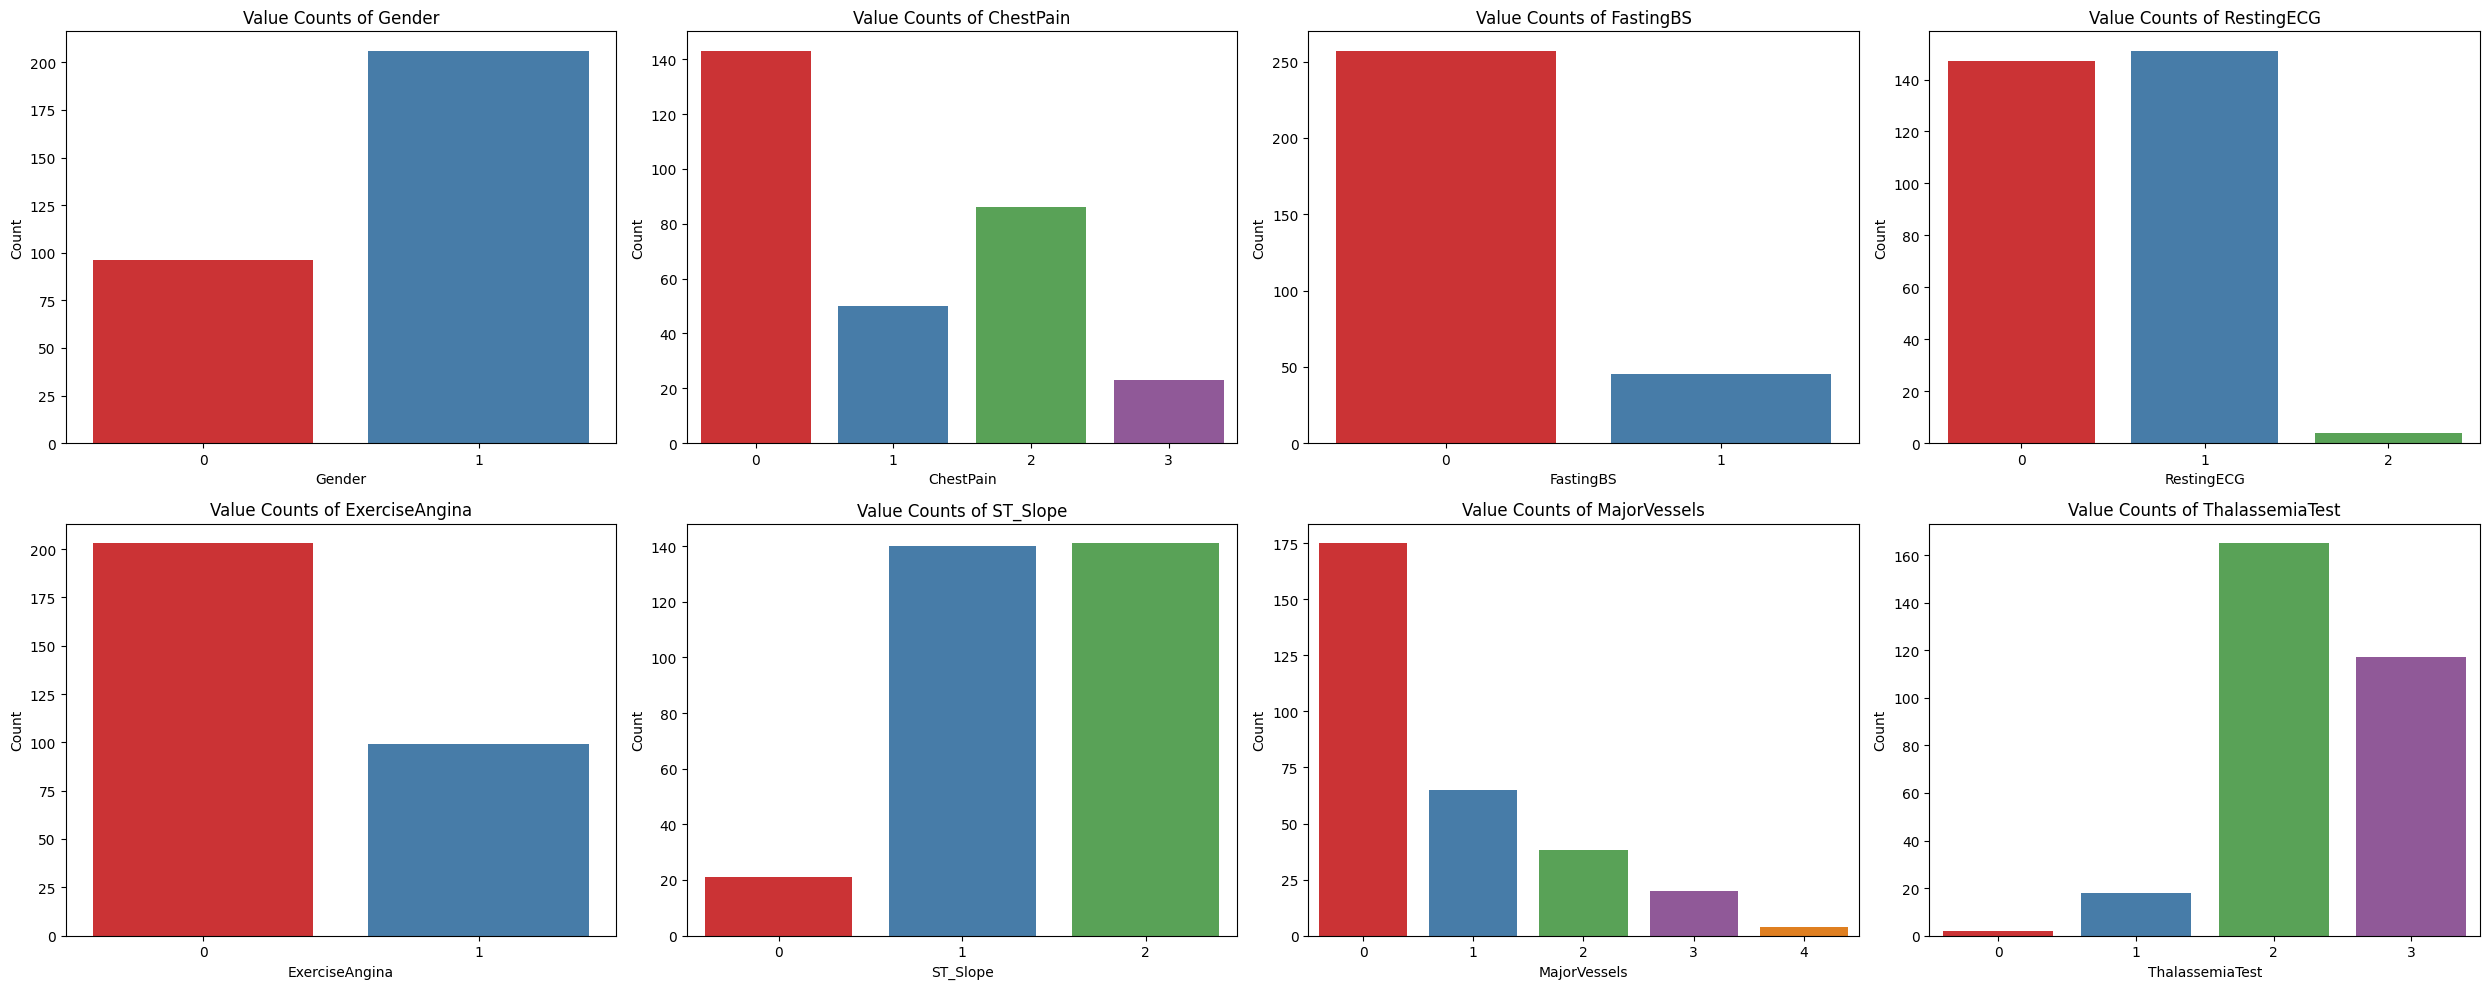

In [57]:
# Count unique values in discrete features

plt.figure(figsize=(25,10))

for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    sns.countplot(x=df[var], palette='Set1')
    plt.title(f'Value Counts of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

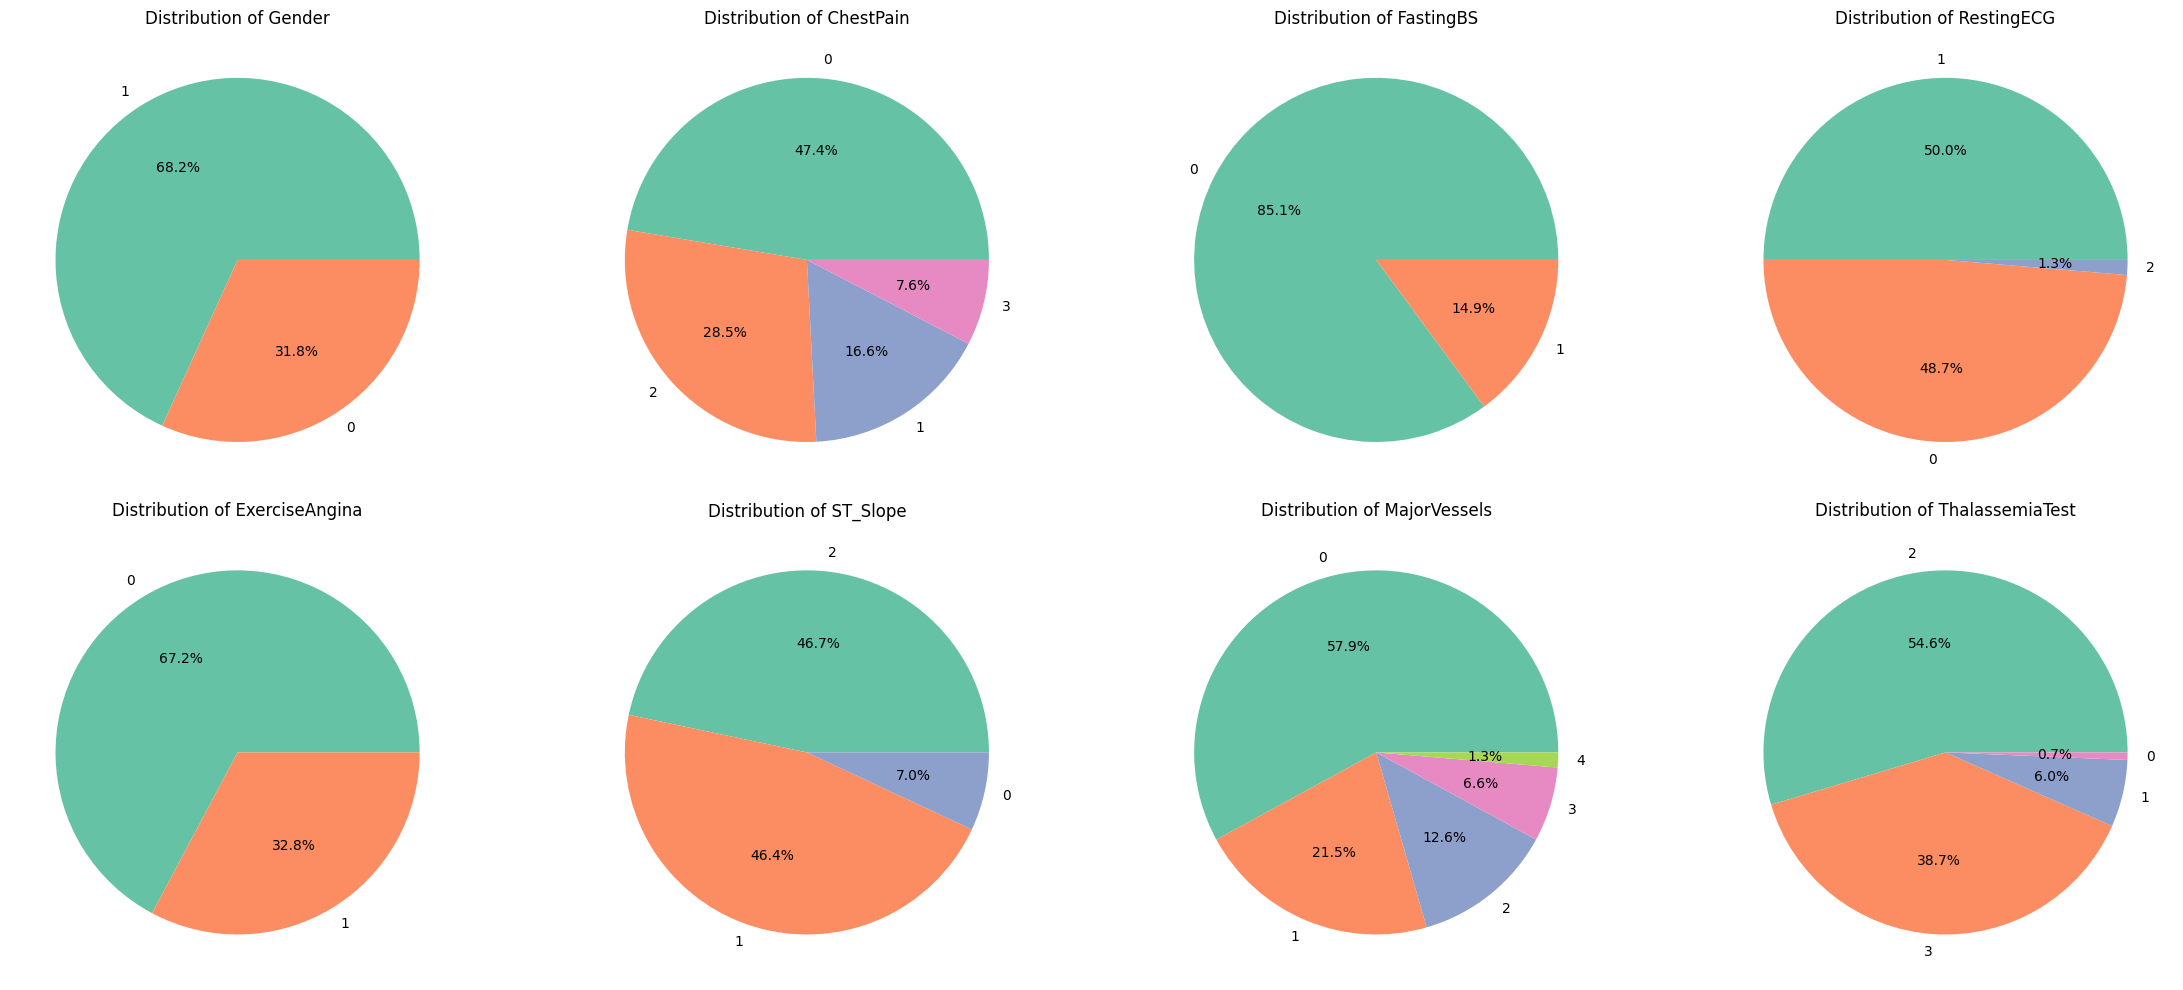

In [ ]:
# Get Distribution % of discreate features
plt.figure(figsize=(25,10))


for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    plt.pie(df[var].value_counts(), labels=df[var].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

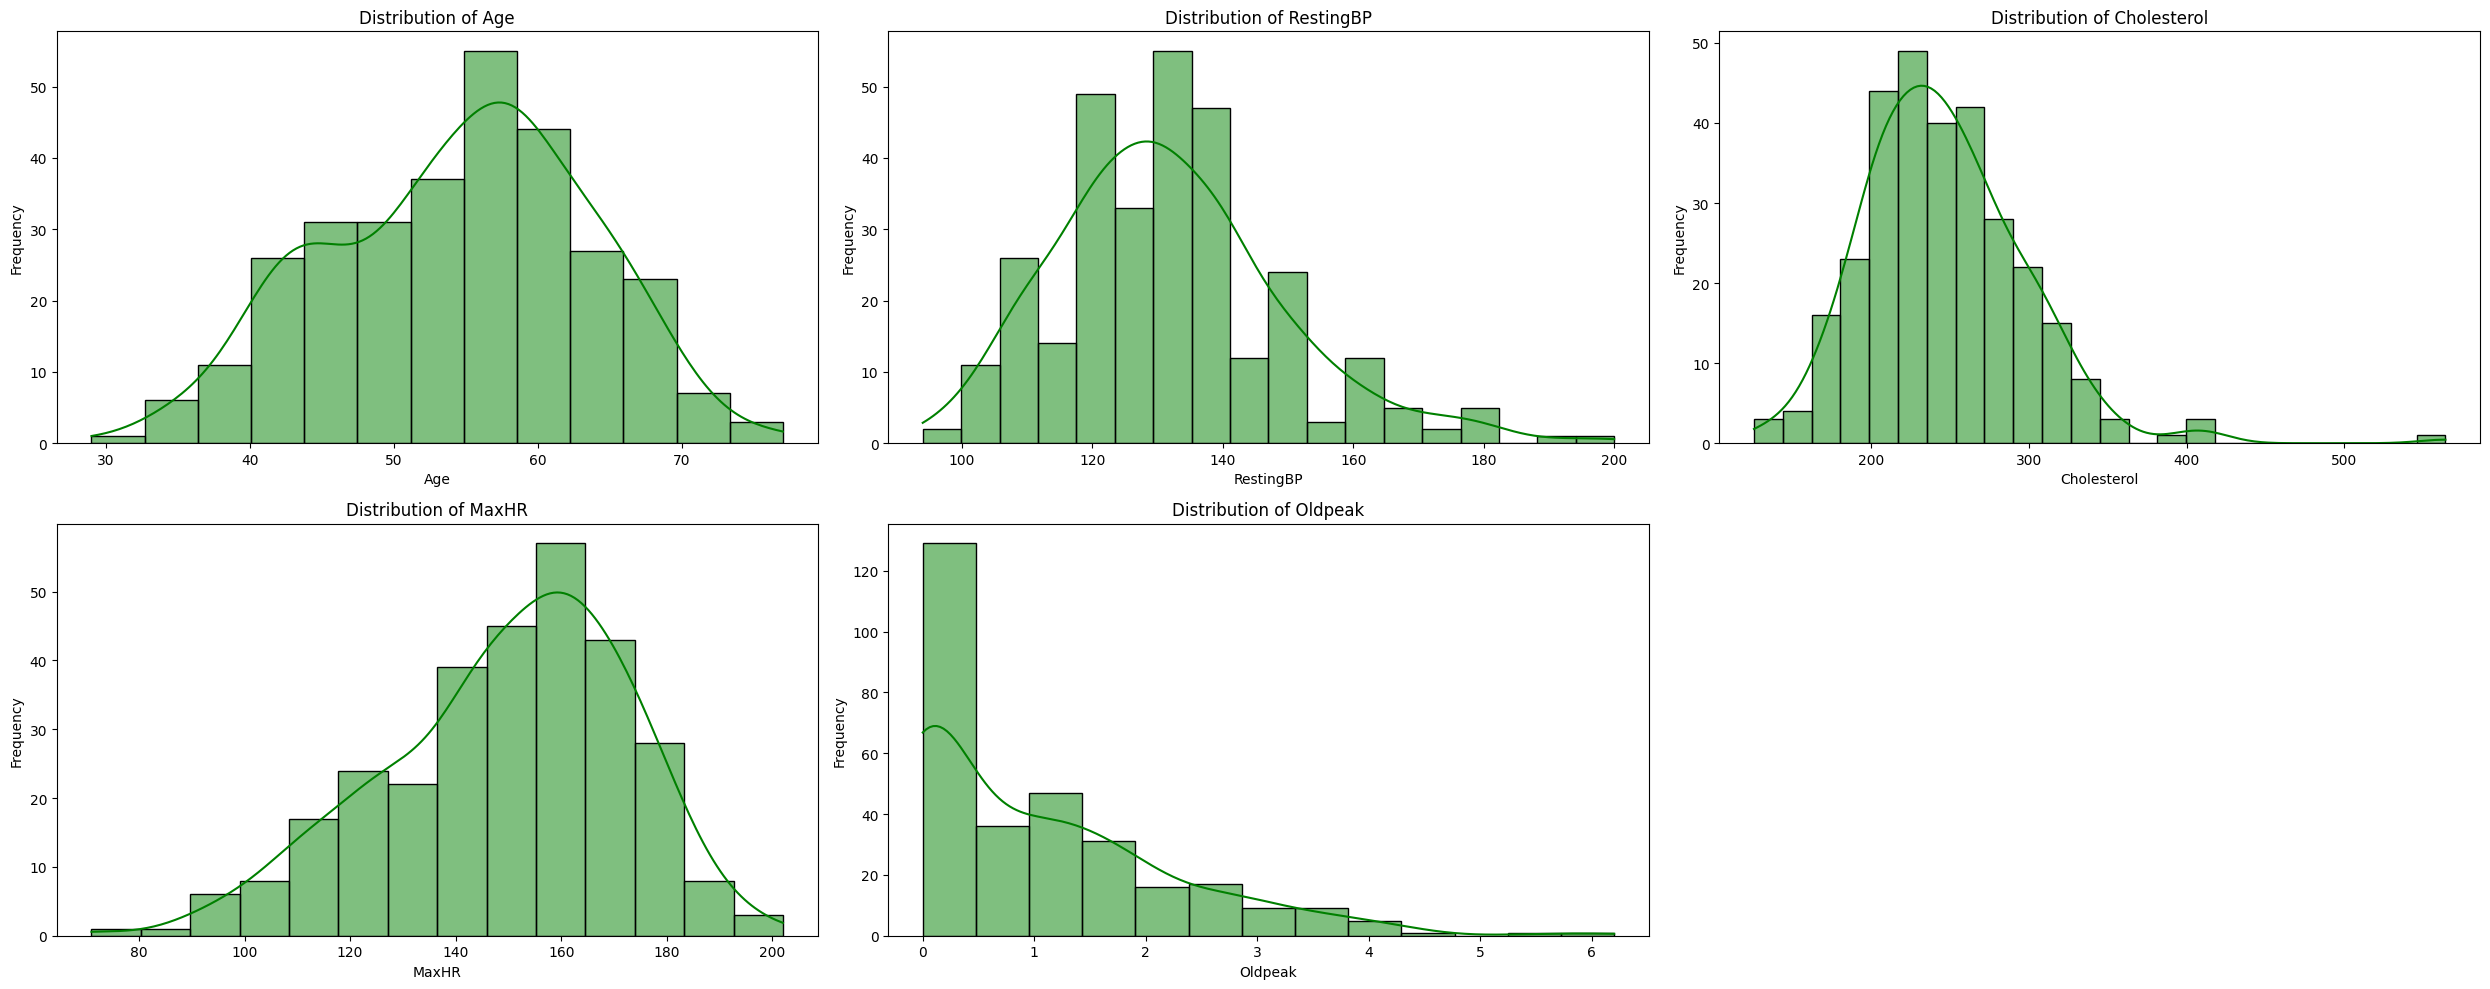

In [59]:
# distribution of continuous features

plt.figure(figsize=(25,10))

for i, var in enumerate(count_feat):
    plt.subplot(2,3, i+1)
    sns.histplot(df[var], kde=True, color='green')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()

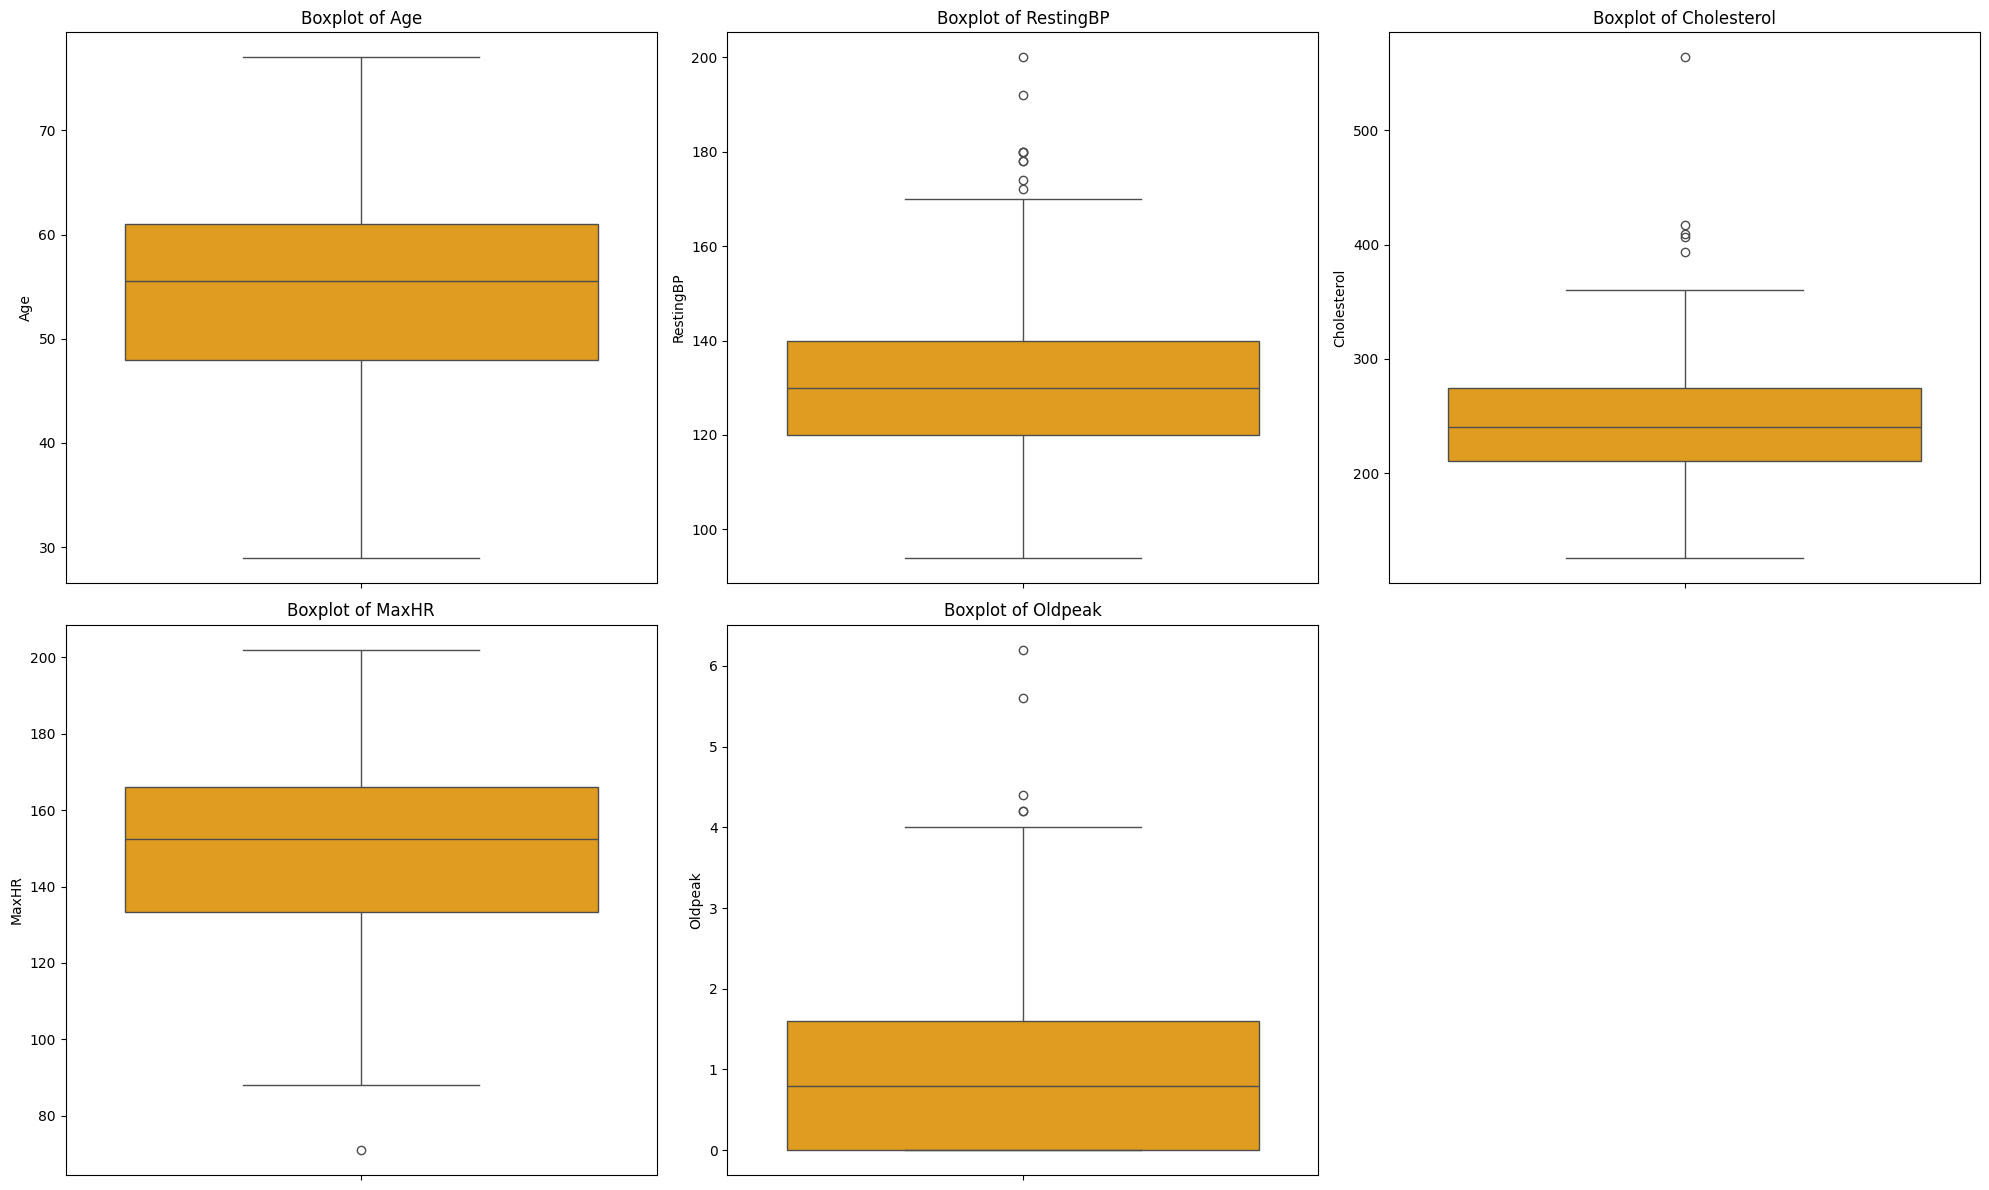

In [66]:
# Outliers Detection
plt.figure(figsize=(20,12))

for i, var in enumerate(count_feat):
    plt.subplot(2,3, i+1)
    sns.boxplot(y=df[var], color='orange', orient='h')
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    plt.tight_layout()

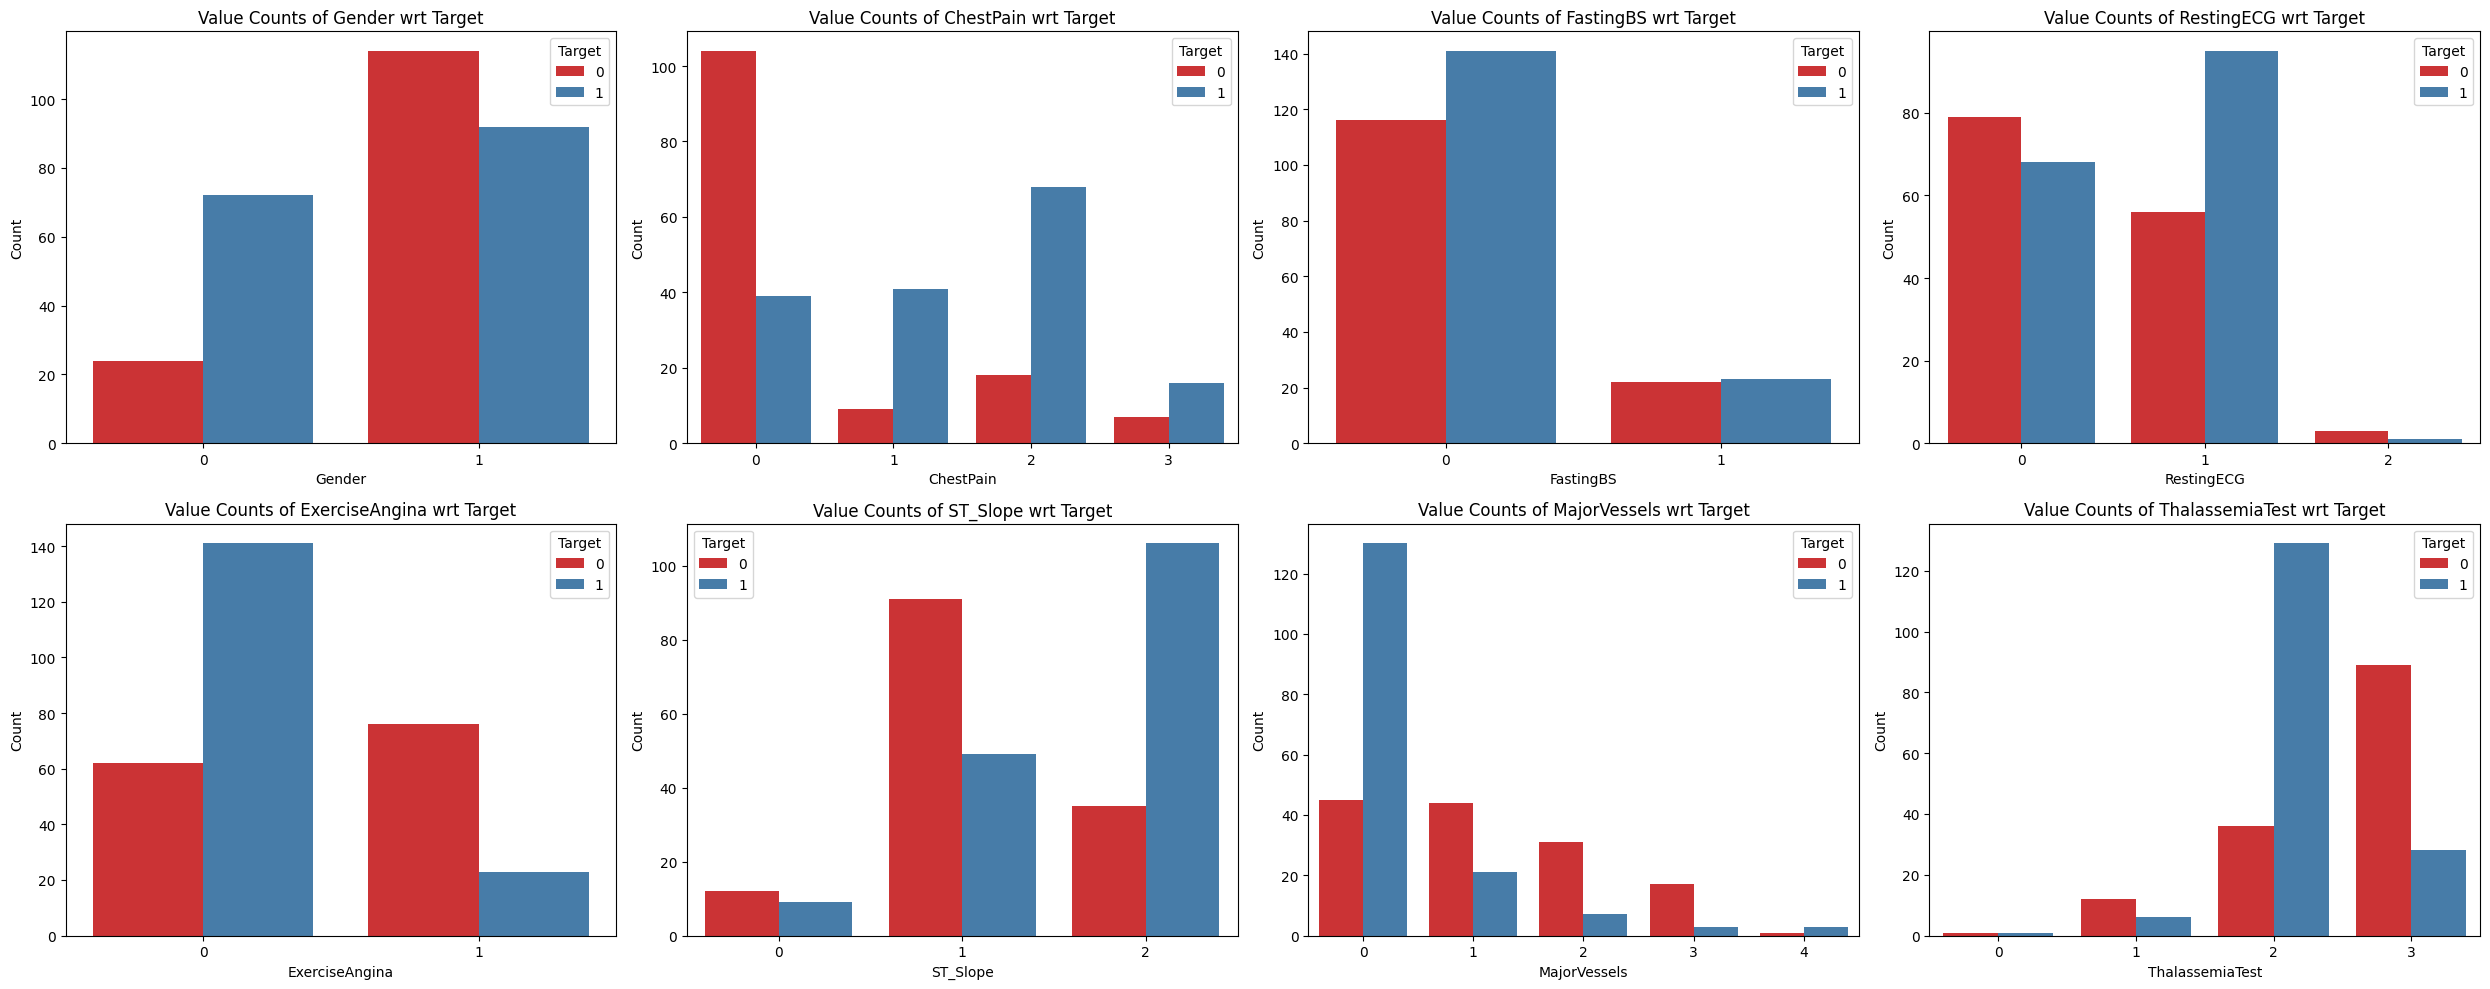

In [68]:
# Relationship b/w continuous features and target variable

plt.figure(figsize=(25,10))

for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    sns.countplot(x=df[var], hue=df['Target'], palette='Set1')
    plt.title(f'Value Counts of {var} wrt Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

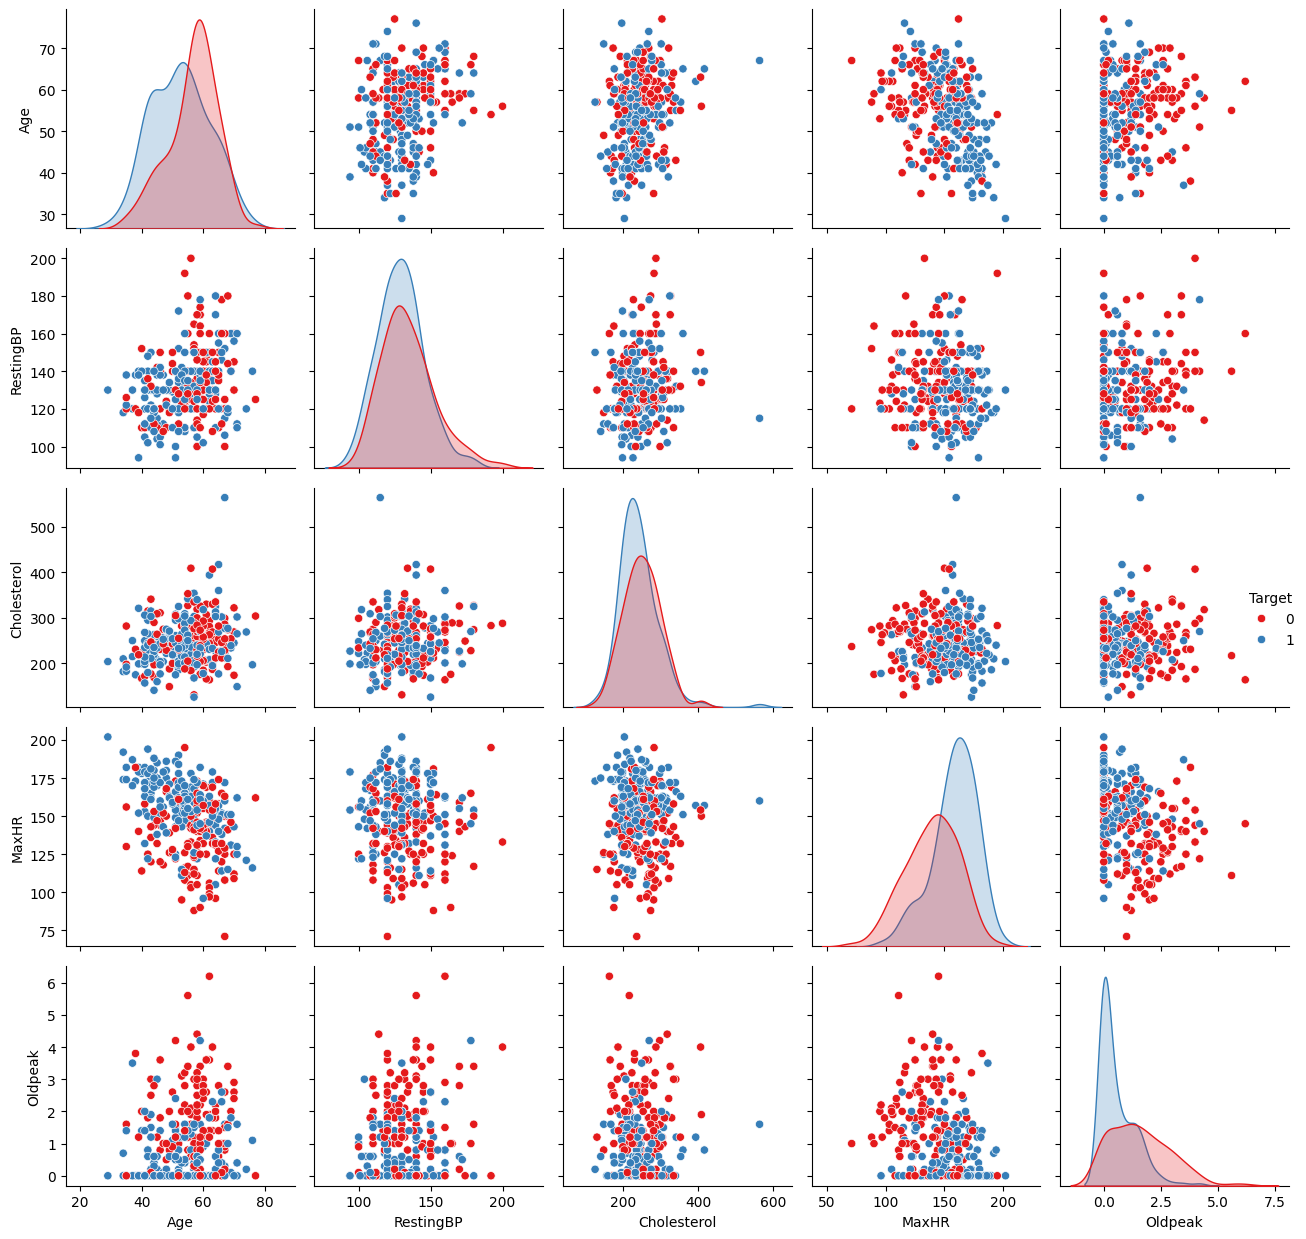

In [69]:
# Pairplot to see relationships of continuous features with target variable

sns.pairplot(df, vars=count_feat, hue='Target', palette='Set1')
plt.tight_layout()
plt.show()